In [1]:
from sklearn import datasets, metrics, preprocessing

boston = datasets.load_boston()
x_data = preprocessing.StandardScaler().fit_transform(boston.data)
y_data = boston.target

print('x_data.shape : ', x_data.shape)
print('y_data.shape : ', y_data.shape)

x_data.shape :  (506, 13)
y_data.shape :  (506,)


In [ ]:
boston

In [2]:
# Native tensorflow
import tensorflow as tf

tf.__version__

'1.15.0'

In [3]:
# setup input and target variable
x = tf.placeholder(tf.float64, shape=(None, 13))
y_true = tf.placeholder(tf.float64, shape=(None))

In [4]:
with tf.name_scope('inference'):
    w = tf.Variable(tf.zeros([1,13], dtype=tf.float64, name='weights'))
    b = tf.Variable(0, dtype=tf.float64, name='bias')
    y_pred = tf.matmul(w, tf.transpose(x))+b
    
with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.square(y_true-y_pred)) #MSE
    
with tf.name_scope('train'):
    learning_rate = 0.1
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train = optimizer.minimize(loss)
    
init = tf.global_variables_initializer()
with tf.Session() as sess :
    sess.run(init)
    for step in range(200):
        MSE, _ = sess.run([loss, train], feed_dict={x:x_data, y_true:y_data})
        
        if (step+1)% 40 == 0:
            print('Step: {:2d}\t MSE: {:.5f}'.format(step+1, MSE))


Step: 40	 MSE: 22.29875
Step: 80	 MSE: 21.99908
Step: 120	 MSE: 21.92992
Step: 160	 MSE: 21.90730
Step: 200	 MSE: 21.89931


In [6]:
# tf.estimator.LinearRegressor이용 구성
NUM_STEPS = 5000
MINIBATCH_SIZE=506

feature_column = [tf.feature_column.numeric_column(key='x', shape=13)]
train_input_fn=tf.estimator.inputs.numpy_input_fn(
    {'x':x_data}, y_data, batch_size=MINIBATCH_SIZE, shuffle=False)
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    {'x':x_data}, y_data, batch_size=MINIBATCH_SIZE, shuffle=False)

reg = tf.estimator.LinearRegressor(
    feature_columns = feature_column,
    optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001),
    model_dir='./model/boston4')

reg.train(input_fn = train_input_fn, steps=NUM_STEPS)
MSE = reg.evaluate(input_fn=eval_input_fn, steps=1)

print(MSE)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './model/boston4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fae6cf7a210>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done ca

In [7]:
# DNN 분류기
import sys
import numpy as np
import tensorflow as tf

In [8]:
#MNIST 데이터 불러오기 위한 함수 정의
def mnist_load():
    (train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()
    
    #Train set
    train_x = train_x.astype('float32')/255.
    train_y = train_y.astype('int32')
    
    #Test set
    test_x = test_x.astype('float32')/255.
    test_y = test_y.astype('int32')
    
    return (train_x, train_y), (test_x, test_y)

In [9]:
# MNIST  데이터 불러오기
(train_x, train_y), (test_x, test_y) = mnist_load()

In [10]:
train_x.shape

(60000, 28, 28)

In [11]:
test_x.shape

(10000, 28, 28)

In [12]:
MINIBATCH_SIZE=128
# Define train_input_fn
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x = {'x':train_x}, y=train_y, shuffle=True, batch_size=MINIBATCH_SIZE
)

In [15]:
NUM_STEPS = 5000
MINIBATCH_SIZE=128

feature_columns = [tf.feature_column.numeric_column('x', shape=[28, 28])]

dnn = tf.estimator.DNNClassifier(
    feature_columns = feature_columns,
    hidden_units = [200],
    n_classes = 10,
    optimizer = tf.train.ProximalAdagradOptimizer(learning_rate=0.2),
    model_dir = './model/DNNClassifier2'
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './model/DNNClassifier2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fae641ec810>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [16]:
dnn.train(
    input_fn=train_input_fn,
    steps = NUM_STEPS
)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into ./model/DNNClassifier2/model.ckpt.
INFO:tensorflow:loss = 307.76733, step = 1
INFO:tensorflow:global_step/sec: 150.32
INFO:tensorflow:loss = 30.706245, step = 101 (0.665 sec)
INFO:tensorflow:global_step/sec: 283.278
INFO:tensorflow:loss = 61.36269, step = 201 (0.348 sec)
INFO:tensorflow:global_step/sec: 290.576
INFO:tensorflow:loss = 28.143349, step = 301 (0.344 sec)
INFO:tensorflow:global_step/sec: 292.46
INFO:tensorflow:loss = 17.500267, step = 401 (0.343 sec)
INFO:tensorflow:Saving checkpoints for 469 into ./model/DNNClassifier2/model.ckpt.
INFO:tensorflow:Loss for final step: 17.438099.


In [17]:
# Define eval_input_fn
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'x':test_x}, y = test_y, shuffle = False
)

reteval = dnn.evaluate(input_fn = eval_input_fn, steps=1)
#test_acc = dnn.evaluate(input_fn = eval_input_fn, steps=1)['accuracy']
print('test accuracy : {}'.format(reteval['accuracy']))
print(reteval)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-06-16T15:38:12Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./model/DNNClassifier2/model.ckpt-469
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-06-16-15:38:13
INFO:tensorflow:Saving dict for global step 469: accuracy = 0.9765625, average_loss = 0.11470255, global_step = 469, loss = 14.681927
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 469: ./model/DNNClassifier2/model.ckpt-469
test accuracy : 0.9765625
{'accuracy': 0.9765625, 'average_loss': 0.11470255, 'loss': 14.681927, 'global_step': 469}


In [19]:
# Generatre example categorical data
import numpy as np
import pandas as pd


In [21]:
N = 10000
weight = np.random.randn(N)*5 +70
spec_id = np.random.randint(0,3, N)
bias = [0.9, 1, 1.1]

height = np.array([weight[i]/100+bias[b] for i, b in enumerate(spec_id)])
spec_name = ['Goblin', 'Human', 'ManBears']
spec = [spec_name[s] for s in spec_id]

In [22]:
weight

array([73.00925747, 70.61641386, 66.74451352, ..., 71.78516557,
       66.70977407, 76.1424599 ])

In [23]:
spec_id

array([0, 0, 2, ..., 2, 0, 2])

In [24]:
height

array([1.63009257, 1.60616414, 1.76744514, ..., 1.81785166, 1.56709774,
       1.8614246 ])

In [25]:
spec

['Goblin',
 'Goblin',
 'ManBears',
 'ManBears',
 'Goblin',
 'Goblin',
 'ManBears',
 'ManBears',
 'Human',
 'Human',
 'Goblin',
 'ManBears',
 'ManBears',
 'Human',
 'Goblin',
 'Goblin',
 'ManBears',
 'Goblin',
 'ManBears',
 'Human',
 'Goblin',
 'ManBears',
 'Human',
 'Human',
 'Human',
 'Human',
 'ManBears',
 'Goblin',
 'Goblin',
 'Human',
 'Goblin',
 'ManBears',
 'Goblin',
 'ManBears',
 'ManBears',
 'Human',
 'Goblin',
 'Human',
 'ManBears',
 'Human',
 'Goblin',
 'ManBears',
 'Human',
 'Human',
 'Goblin',
 'ManBears',
 'ManBears',
 'Human',
 'ManBears',
 'Goblin',
 'ManBears',
 'Goblin',
 'ManBears',
 'ManBears',
 'ManBears',
 'Human',
 'Human',
 'ManBears',
 'Human',
 'ManBears',
 'Goblin',
 'ManBears',
 'ManBears',
 'ManBears',
 'Goblin',
 'Goblin',
 'Goblin',
 'Goblin',
 'ManBears',
 'Goblin',
 'ManBears',
 'Human',
 'ManBears',
 'Goblin',
 'Goblin',
 'Goblin',
 'Goblin',
 'Goblin',
 'Goblin',
 'ManBears',
 'ManBears',
 'Goblin',
 'Goblin',
 'Goblin',
 'ManBears',
 'ManBears',
 'Hum

In [26]:
# plot and create data frame
%matplotlib inline
import matplotlib.pyplot as plt

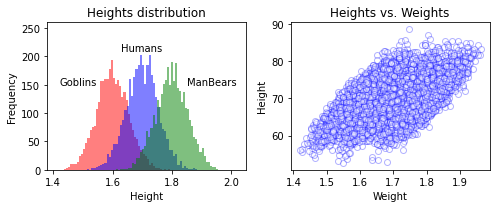

In [29]:
colors = ['r','b','g']
f,axarr = plt.subplots(1, 2, figsize=[7,3])
ax = axarr[0]
for ii in range(3):
    ax.hist(height[spec_id==ii], 50, color=colors[ii], alpha=0.5)
    ax.set_xlabel('Height')
    ax.set_ylabel('Frequency')
    ax.set_title('Heights distribution')
    
height = height+np.random.randn(N)*0.015
ax.text(1.42, 150, 'Goblins')
ax.text(1.63, 210, 'Humans')
ax.text(1.85, 150, 'ManBears')

ax.set_ylim([0,260])
ax.set_xlim([1.38, 2.05])

df = pd.DataFrame({'Species':spec,'Weight':weight,'Height':height})

ax = axarr[1]
ax.plot(df['Height'],df['Weight'],'o',alpha=0.3,mfc='w',mec='b')
ax.set_xlabel('Weight')
ax.set_ylabel('Height')
ax.set_title('Heights vs. Weights')



plt.tight_layout()
plt.show()

In [30]:
import tensorflow as tf

# Feature Columns
Weight = tf.feature_column.numeric_column(key='Weight')
Species = tf.feature_column.categorical_column_with_vocabulary_list(
            key='Species',
            vocabulary_list=['Goblin', 'Human', 'ManBears'])

In [31]:
#LinearRegressor() Estimator
reg = tf.estimator.LinearRegressor(feature_columns=[Weight, Species], model_dir='./model/spec_weights')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './model/spec_weights', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fae400343d0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [34]:
# 위에서 정의한 LinearRegressor()를 학습시킬 때 reg.train() 의 input_fn 인자에 학습에 사용할 데이터를
# 반환하는 캡슐화된 입력함수를 별도로 만들어 주어야 한다.
# 아래 코드에서 input_fn이 입력함수에 해당되며, pandas의 dataframe을 입력으로 받아 텐서플로에서
# 사용가능한 텐서가 들어있는 feature_cols 딕셔너리와 labels를 반환한다.
# feature_cols 딕션너리에서 Species 값은 tf.feature_column을 이용해 더미 인코딩을 해주었으므로, 이러한
# 형태를 담을 수 있는  tf.SparseTensor를 사용한다. tf.SparseTensor()는 아래 예제와 같이 텐서Tensor의
# 인덱스에 해당하는 값을 매핑해준다.
A=tf.SparseTensor(indices=[[0,0],[1,2]], values=[1,2], dense_shape=[3,4])
# (0,0)과 (1, 2) 원소에 values에 입력된 1과 2를 나란히 입력하고, 나머지 원소는 0 으로 채운 3행 4열 텐서를
# 만든다.
# 결과
# [ [ 1, 0, 0, 0]
#   [ 0, 0, 2, 0]
#   [ 0, 0, 0, 0]]

In [43]:
tf.sparse.to_dense(A)

<tf.Tensor 'SparseToDense:0' shape=(3, 4) dtype=int32>

In [44]:
print(type(A))

<class 'tensorflow.python.framework.sparse_tensor.SparseTensor'>


In [46]:
dense = tf.sparse_tensor_to_dense(A)

In [48]:
# Sparse tensor 확인
sess = tf.InteractiveSession()
dense.eval()

array([[1, 0, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 0]], dtype=int32)

In [49]:
def input_fn(df):
    feature_cols={
        'Weight': tf.constant(df['Weight'].values),
        'Species': tf.SparseTensor(
            indices=[[i,0] for i in range(df['Species'].size)],
            values = df['Species'].values,
            dense_shape=[df['Species'].size, 1]
        )
    }
    labels = tf.constant(df['Height'].values)
    
    return feature_cols, labels

In [50]:
#Training
reg.train(input_fn=lambda: input_fn(df), steps=500)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into ./model/spec_weights/model.ckpt.
INFO:tensorflow:loss = 29010.973, step = 1
INFO:tensorflow:global_step/sec: 233.14
INFO:tensorflow:loss = 54.583862, step = 101 (0.430 sec)
INFO:tensorflow:global_step/sec: 219.229
INFO:tensorflow:loss = 50.349525, step = 201 (0.456 sec)
INFO:tensorflow:global_step/sec: 348.449
INFO:tensorflow:loss = 48.935226, step = 301 (0.287 sec)
INFO:tensorflow:global_step/sec: 226.363
INFO:tensorflow:loss = 47.682003, step = 401 (0.447 sec)
INFO:tensorflow:Saving checkpoints for 500 into ./model/spec_weights/model.ckpt.
INFO:tensorflow:Loss for final step: 46.483154.


In [52]:
# 학습이 끝난 후 추정된 가중치들을 .get_variable_value() 메소드를 이용해 변수의 값을 확인할 수 있다. 
# 변수의 값은 .get_variable_names()를 통해 구할 수 있다.
print('variable names:\n', reg.get_variable_names())
print('='*50)

variable names:
 ['global_step', 'linear/linear_model/Species/weights', 'linear/linear_model/Species/weights/part_0/Ftrl', 'linear/linear_model/Species/weights/part_0/Ftrl_1', 'linear/linear_model/Weight/weights', 'linear/linear_model/Weight/weights/part_0/Ftrl', 'linear/linear_model/Weight/weights/part_0/Ftrl_1', 'linear/linear_model/bias_weights', 'linear/linear_model/bias_weights/part_0/Ftrl', 'linear/linear_model/bias_weights/part_0/Ftrl_1']


In [55]:
w_w = reg.get_variable_value('linear/linear_model/Weight/weights')
s_w = reg.get_variable_value('linear/linear_model/Species/weights')
b = reg.get_variable_value('linear/linear_model/bias_weights')

print('Global Steps : {}'.format(reg.get_variable_value('global_step')))
print('Estimation for weight: {}'.format(w_w))
print('Estimation for Species: {}'.format(s_w+b))

Global Steps : 500
Estimation for weight: [[0.02256914]]
Estimation for Species: [[0.01606311]
 [0.11744675]
 [0.2150599 ]]


In [ ]:
# tf.estimator로 사용자 정의 CNN 만들어 보기
# 먼저 네트워크를 구현하는 모델 함수 cnn_model_fn 와 학습 설정 model_params 포함한 객체를 생성해야 함

In [77]:
# model_params
model_params = {'learning_rate':1e-4, 'dropout':0.5}

# Generate model_fn
def cnn_model_fn(features, labels, mode, params):
    # Input Layer
    x_image = tf.reshape(features['x'], [-1,28, 28, 1]) #(N, H, W, C) (배치, 높이, 너비, 컬러채널)
    
    # Conv layer 1
    conv1 = tf.layers.conv2d(x_image, 32, [5,5],
                             padding='same',
                             activation=tf.nn.relu,
                             kernel_initializer=tf.truncated_normal_initializer(stddev=0.1),
                             bias_initializer = tf.constant_initializer(0.1)
                             )
    pool1 = tf.layers.max_pooling2d(conv1, pool_size=[2,2], strides=2)
    
    # Conv layer 2
    conv2 = tf.layers.conv2d(pool1, 64, [5,5],
                             padding='same',
                             activation=tf.nn.relu,
                             kernel_initializer=tf.truncated_normal_initializer(stddev=0.1),
                             bias_initializer=tf.constant_initializer(0.1)
                             )
    pool2 = tf.layers.max_pooling2d(conv2, pool_size=[2,2], strides=2)
    
    # Fully-Connected layer
    pool2_flat = tf.reshape(pool2, [-1, 7*7*64])
    dense = tf.layers.dense(pool2_flat, 1024,
                            activation=tf.nn.relu,
                            kernel_initializer=tf.truncated_normal_initializer(stddev=0.1),
                            bias_initializer = tf.constant_initializer(0.1)
                            )
    dropout=tf.layers.dropout(dense,
                              rate=params['dropout'], #rate: dropout 시킬 비율
                              training=mode == tf.estimator.ModeKeys.TRAIN
                              )
    #logits layer
    logits = tf.layers.dense(dropout, 10, activation=None)
    
    # prediction
    predictions = {
        # Generated predictions (for PREDICT and EVAL mode)
        'classes':tf.argmax(input=logits, axis=1)
    }
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    
    # loss (for both TRAIN and EVAL modes)
    loss = tf.losses.sparse_softmax_cross_entropy(logits=logits, labels=labels)
    
    # Configure the training op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.AdamOptimizer(learning_rate=params['learning_rate'])
        train_op = optimizer.minimize(loss=loss,
                                     global_step = tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)
    
    # Add evaluation metrics (for EVAL mode)
    eval_metric_ops={
        'accuracy': tf.metrics.accuracy(labels=labels,
                                        predictions=predictions['classes'])
    }
    
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [66]:
#MNIST 데이터 불러오기 위한 함수 정의
def mnist_load():
    (train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()
    
    #Train set
    train_x = train_x.astype('float32')/255.
    train_y = train_y.astype('int32')
    
    #Test set
    test_x = test_x.astype('float32')/255.
    test_y = test_y.astype('int32')
    
    return (train_x, train_y), (test_x, test_y)

In [67]:
# MNIST 데이터 불러오기
(train_x, train_y), (test_x, test_y) = mnist_load()

In [78]:
# tf.estimator를 이용해서 Estimator를 인스턴스화 한다.
# Generate Estimator
CNN = tf.estimator.Estimator(model_fn = cnn_model_fn,
                             params=model_params,
                             model_dir='./model/mnist_cnn')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './model/mnist_cnn', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fae21af5d50>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [69]:
# Train the model
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'x':train_x},
    y=train_y,
    batch_size=100,
    num_epochs=None,
    shuffle=True)

In [80]:
CNN.train(input_fn = train_input_fn,
          steps=2000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./model/mnist_cnn/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1000 into ./model/mnist_cnn/model.ckpt.
INFO:tensorflow:loss = 0.17124966, step = 1001
INFO:tensorflow:global_step/sec: 4.46529
INFO:tensorflow:loss = 0.15917633, step = 1101 (22.397 sec)
INFO:tensorflow:global_step/sec: 4.412
INFO:tensorflow:loss = 0.092172645, step = 1201 (22.665 sec)
INFO:tensorflow:global_step/sec: 4.45646
INFO:tensorflow:loss = 0.10162232, step = 1301 (22.439 sec)
INFO:tensorflow:global_step/sec: 4.42487
INFO:tensorflow:loss = 0.124491826, step = 1401 (22.599 sec)
INFO:tensorflow:global_step/sec: 4.36526
INFO:tensorflow:loss = 0.08670389, step = 1501 (22.909 sec)
INFO:tensorflow:global_step/sec: 4.39805
INFO:tensorflow

In [82]:
# 테스트 데이터를 이용한 모델 평가...
# Evaluate the model and print results
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x = {'x':test_x},
    y = test_y,
    num_epochs =1,
    shuffle = False
    )

eval_results = CNN.evaluate(input_fn=eval_input_fn)
print(eval_results)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-06-16T20:53:42Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./model/mnist_cnn/model.ckpt-3000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-06-16-20:53:47
INFO:tensorflow:Saving dict for global step 3000: accuracy = 0.9862, global_step = 3000, loss = 0.04202297
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 3000: ./model/mnist_cnn/model.ckpt-3000
{'accuracy': 0.9862, 'loss': 0.04202297, 'global_step': 3000}
